# Data Exploration

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in file
#read_file = pd.read_excel("Resources/KPMG_VI_New_raw_data_update_final.xlsx")
#df = pd.DataFrame(read_file)

xls = pd.ExcelFile('../Resources/KPMG_VI_New_raw_data_update_final.xlsx')
transactions_df = pd.read_excel(xls, 'Transactions')
demographic_df = pd.read_excel(xls, 'CustomerDemographic')
address_df = pd.read_excel(xls, 'CustomerAddress')

# identifying the header row
new_header = transactions_df.iloc[0]
transactions_df = transactions_df[1:]
transactions_df.columns = new_header
transactions_df = transactions_df.reset_index(drop=True)

new_header = demographic_df.iloc[0]
demographic_df = demographic_df[1:]
demographic_df.columns = new_header
demographic_df = demographic_df.reset_index(drop=True)

new_header = address_df.iloc[0]
address_df = address_df[1:]
address_df.columns = new_header
address_df = address_df.reset_index(drop=True)


In [3]:
transactions_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [4]:
demographic_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [5]:
address_df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

## Data cleaning - for accurate results.

In [6]:
# merge transaction and demographic tables together
merge_df = pd.merge(transactions_df, demographic_df, on="customer_id")
merge_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10
1,11065,1,2950,2017-10-16 00:00:00,False,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10


In [7]:
# merge address_df with merge_df
complete_df = pd.merge(merge_df, address_df, on="customer_id")
complete_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16 00:00:00,False,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05 00:00:00,False,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10,4 Shopko Circle,2196,NSW,Australia,5


In [8]:
# show value counts of the complete_df
complete_df.count()


0
transaction_id                         19968
product_id                             19968
customer_id                            19968
transaction_date                       19968
online_order                           19609
order_status                           19968
brand                                  19773
product_line                           19773
product_class                          19773
product_size                           19773
list_price                             19968
standard_cost                          19773
product_first_sold_date                19773
first_name                             19968
last_name                              19326
gender                                 19968
past_3_years_bike_related_purchases    19968
DOB                                    19522
job_title                              17589
job_industry_category                  16746
wealth_segment                         19968
deceased_indicator                     19968
default 

In [9]:
# drop rows with null values and drop the default column
complete_df = complete_df.dropna()
complete_df.drop("default", axis=1, inplace=True)
complete_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16 00:00:00,False,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05 00:00:00,False,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5


In [10]:
# check for missing values
complete_df.count()


0
transaction_id                         12970
product_id                             12970
customer_id                            12970
transaction_date                       12970
online_order                           12970
order_status                           12970
brand                                  12970
product_line                           12970
product_class                          12970
product_size                           12970
list_price                             12970
standard_cost                          12970
product_first_sold_date                12970
first_name                             12970
last_name                              12970
gender                                 12970
past_3_years_bike_related_purchases    12970
DOB                                    12970
job_title                              12970
job_industry_category                  12970
wealth_segment                         12970
deceased_indicator                     12970
owns_car

In [11]:
# discover what values are in the online_order column
complete_df["online_order"].value_counts()


False    6498
True     6472
Name: online_order, dtype: int64

In [12]:
# discover what values are in the order_status column
complete_df["order_status"].value_counts()


Approved     12843
Cancelled      127
Name: order_status, dtype: int64

In [13]:
# only show data where order_status column == approved
converted_df = complete_df[complete_df['order_status'] == "Approved"]
converted_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16 00:00:00,False,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05 00:00:00,False,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5


In [14]:
# only show data where online_order column == true
converted_df = converted_df[converted_df['online_order'] == 1]
converted_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
5,9155,91,3120,2017-10-30 00:00:00,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
7,13066,38,3120,2017-01-20 00:00:00,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
11,1674,47,402,2017-11-04 00:00:00,True,Approved,Trek Bicycles,Road,low,small,...,Retail,Affluent Customer,N,No,22,586 Miller Parkway,2835,NSW,Australia,1
12,13820,12,402,2017-09-30 00:00:00,True,Approved,WeareA2B,Standard,medium,medium,...,Retail,Affluent Customer,N,No,22,586 Miller Parkway,2835,NSW,Australia,1


In [15]:
# check values
converted_df["online_order"].value_counts()


True    6396
Name: online_order, dtype: int64

In [16]:
# check values
converted_df["order_status"].value_counts()


Approved    6396
Name: order_status, dtype: int64

In [17]:
# change product_first_sold_date, and DOB to datetime datatype
converted_df = converted_df.copy()
converted_df = converted_df.astype({"transaction_date":"datetime64","product_first_sold_date": "datetime64",
                                      "DOB": "datetime64"})
converted_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
5,9155,91,3120,2017-10-30,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
7,13066,38,3120,2017-01-20,True,Approved,Solex,Standard,medium,medium,...,Health,Mass Customer,N,Yes,10,4 Shopko Circle,2196,NSW,Australia,5
11,1674,47,402,2017-11-04,True,Approved,Trek Bicycles,Road,low,small,...,Retail,Affluent Customer,N,No,22,586 Miller Parkway,2835,NSW,Australia,1
12,13820,12,402,2017-09-30,True,Approved,WeareA2B,Standard,medium,medium,...,Retail,Affluent Customer,N,No,22,586 Miller Parkway,2835,NSW,Australia,1


## Data Analysis

In [18]:
converted_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

In [19]:
# only show data that we will be analyzing
shrunken_df = converted_df[["customer_id", "online_order", "list_price", "standard_cost", "first_name",
                           "last_name"]]
shrunken_df.head()

,customer_id,online_order,list_price,standard_cost,first_name,last_name
3,3120,True,2091.47,388.92,Lauree,O'Donnell
5,3120,True,100.35,75.26,Lauree,O'Donnell
7,3120,True,1577.53,826.51,Lauree,O'Donnell
11,402,True,1720.7,1531.42,Berne,Donegan
12,402,True,1231.15,161.6,Berne,Donegan


In [20]:
# grouped data
grouped_df = shrunken_df.groupby('customer_id').agg({"online_order": 'sum','list_price': 'sum', "standard_cost": 'sum', 
                                                  'first_name': 'first', 'last_name': 'first'})
# replace "True" with the 1
# hint: True is considered int64 in this dataset
grouped_df['online_order'] = grouped_df['online_order'].replace(1, 1)
grouped_df


,online_order,list_price,standard_cost,first_name,last_name
customer_id,,,,,
1,6,6189.31,4174.84,Laraine,Medendorp
2,1,1403.5,954.82,Eli,Bockman
9,1,1577.53,826.51,Mala,Lind
12,3,1495.33,1005.32,Sawyere,Flattman
13,4,3317.47,2490.21,Gabriele,Norcross
...,...,...,...,...,...
3493,5,8288.52,5615.46,Jeffie,Eakly
3494,2,2072.5,1229.78,Robers,Richen
3495,3,2256.56,1484.37,Constantine,Frissell


In [21]:
# subtract the list_price from the standard_cost to get the profit of the orders
grouped_df["profit"] = grouped_df["list_price"] - grouped_df["standard_cost"]
grouped_df = grouped_df[["online_order", "list_price", "standard_cost", "profit", "first_name", "last_name"]]
grouped_df.head()


,online_order,list_price,standard_cost,profit,first_name,last_name
customer_id,,,,,,
1,6,6189.31,4174.84,2014.47,Laraine,Medendorp
2,1,1403.5,954.82,448.68,Eli,Bockman
9,1,1577.53,826.51,751.02,Mala,Lind
12,3,1495.33,1005.32,490.01,Sawyere,Flattman
13,4,3317.47,2490.21,827.26,Gabriele,Norcross


In [22]:
# concatenate first_name and last_name into one column called full_name
grouped_df["full_name"] = grouped_df['first_name'] + ' ' + grouped_df['last_name']
grouped_df = grouped_df[["online_order", "list_price", "standard_cost", "profit", 
                               "full_name", "first_name", "last_name"]]
grouped_df.head()

/var/folders/2z/s_gmznmx4sb0cn5q7ltc3nkc0000gn/T/ipykernel_1327/2414127185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["full_name"] = grouped_df['first_name'] + ' ' + grouped_df['last_name']


,online_order,list_price,standard_cost,profit,full_name,first_name,last_name
customer_id,,,,,,,
1,6,6189.31,4174.84,2014.47,Laraine Medendorp,Laraine,Medendorp
2,1,1403.5,954.82,448.68,Eli Bockman,Eli,Bockman
9,1,1577.53,826.51,751.02,Mala Lind,Mala,Lind
12,3,1495.33,1005.32,490.01,Sawyere Flattman,Sawyere,Flattman
13,4,3317.47,2490.21,827.26,Gabriele Norcross,Gabriele,Norcross


In [23]:
# sort the list_price column
price_df = grouped_df.sort_values("list_price", ascending=False)
top_5_spenders = price_df.head()
top_5_spenders

,online_order,list_price,standard_cost,profit,full_name,first_name,last_name
customer_id,,,,,,,
2132,7,11539.11,5588.93,5950.18,Davina Dougary,Davina,Dougary
941,6,10566.55,4546.55,6020.0,Tye Doohan,Tye,Doohan
3032,6,10222.97,4206.87,6016.1,Renado Wonfor,Renado,Wonfor
1597,6,10207.61,5092.9,5114.71,Jeffry Slowly,Jeffry,Slowly
2985,8,10114.42,4003.57,6110.85,Kerby Nesfield,Kerby,Nesfield


In [24]:
# sort the profit column
profit_df = grouped_df.sort_values("profit", ascending=False)
top_5_profits = profit_df.head()
top_5_profits


,online_order,list_price,standard_cost,profit,full_name,first_name,last_name
customer_id,,,,,,,
363,5,9813.69,1384.28,8429.41,Sabrina Caddy,Sabrina,Caddy
2637,7,9357.3,2119.56,7237.74,Marcile Christley,Marcile,Christley
1022,5,8161.4,1716.91,6444.49,Suzann Wilks,Suzann,Wilks
1150,4,7865.18,1671.83,6193.35,Bernelle Warwick,Bernelle,Warwick
2985,8,10114.42,4003.57,6110.85,Kerby Nesfield,Kerby,Nesfield


In [25]:
order_df = grouped_df["online_order"].value_counts()
order_df = pd.DataFrame(order_df)
order_df = order_df.rename_axis("#_of_orders")
order_df = order_df.rename(columns={"online_order": "order_frequency"})
order_df = order_df.sort_index(ascending=True)

order_df

,order_frequency
#_of_orders,
1,401
2,595
3,527
4,330
5,203
6,88
7,40
8,9
9,1


In [26]:
converted_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

In [27]:
# shrink data for 3rd visualization
shrunken_data2 = converted_df[["customer_id", "transaction_date", "online_order", "list_price",
                              "standard_cost"]]
shrunken_data2.head()


,customer_id,transaction_date,online_order,list_price,standard_cost
3,3120,2017-05-21,True,2091.47,388.92
5,3120,2017-10-30,True,100.35,75.26
7,3120,2017-01-20,True,1577.53,826.51
11,402,2017-11-04,True,1720.7,1531.42
12,402,2017-09-30,True,1231.15,161.6


In [28]:
# grouped data
binning_df = shrunken_data2.groupby('customer_id').agg({"transaction_date": "first", "online_order": 'sum',
                                                         'list_price': 'sum', "standard_cost": "sum"})
# replace "True" with the 1
# hint: True is considered int64 in this dataset
binning_df['online_order'] = binning_df['online_order'].replace(1, 1)
binning_df.head()

,transaction_date,online_order,list_price,standard_cost
customer_id,,,,
1,2017-04-06,6,6189.31,4174.84
2,2017-05-04,1,1403.5,954.82
9,2017-09-30,1,1577.53,826.51
12,2017-09-04,3,1495.33,1005.32
13,2017-08-02,4,3317.47,2490.21


In [29]:
# add profit column
# subtract the list_price from the standard_cost to get the profit of the orders
binning_df["profit"] = binning_df["list_price"] - binning_df["standard_cost"]
binning_df = binning_df[["transaction_date","online_order", "list_price", "standard_cost", "profit"]]
binning_df.head()


,transaction_date,online_order,list_price,standard_cost,profit
customer_id,,,,,
1,2017-04-06,6,6189.31,4174.84,2014.47
2,2017-05-04,1,1403.5,954.82,448.68
9,2017-09-30,1,1577.53,826.51,751.02
12,2017-09-04,3,1495.33,1005.32,490.01
13,2017-08-02,4,3317.47,2490.21,827.26


In [30]:
print(binning_df["transaction_date"].max())
print(binning_df["transaction_date"].min())

2017-12-30 00:00:00
2017-01-01 00:00:00


In [31]:
# Create the bins in which data will be held 
# Define the start and end dates
start_date = '2017-01-01 00:00:00'
end_date = '2017-12-30 00:00:00'

# Create four evenly spaced bins
bins = pd.date_range(start=start_date, end=end_date, periods=5)
# Create the names for the five bins
group_names = ["Q1", "Q2", "Q3", "Q4"]

# Cut the datetime values into bins
binning_df['bin_column'] = pd.cut(binning_df['transaction_date'], bins=bins, labels=group_names)

binning_df.head()


,transaction_date,online_order,list_price,standard_cost,profit,bin_column
customer_id,,,,,,
1,2017-04-06,6,6189.31,4174.84,2014.47,Q2
2,2017-05-04,1,1403.5,954.82,448.68,Q2
9,2017-09-30,1,1577.53,826.51,751.02,Q3
12,2017-09-04,3,1495.33,1005.32,490.01,Q3
13,2017-08-02,4,3317.47,2490.21,827.26,Q3


In [32]:
# Create a groupby object
quarter_group = binning_df.groupby('bin_column').agg({"online_order": 'sum','list_price': 'sum', 
                                                       "profit": "sum"})

# Find how many rows fall into each bin
#print(quarter_group[list_price].count())
quarter_group.head()


,online_order,list_price,profit
bin_column,,,
Q1,1558,1690283.75,835823.79
Q2,1603,1791476.61,899743.69
Q3,1502,1675774.31,819969.3
Q4,1709,1882132.67,920023.6


## Visualized Insights

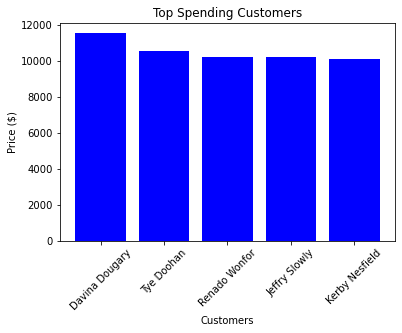

In [33]:
# Visualize which customers we profited most from (bar)
price_list = top_5_spenders["list_price"].tolist()
customer_id_list = top_5_spenders.index.tolist()
name_list = top_5_spenders["full_name"].tolist()

name = name_list
customer_id = customer_id_list
list_price = price_list
x_axis = np.arange(len(list_price))

plt.bar(x_axis, list_price, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, name, rotation=45)

# Give the chart a title, x label, and y label
plt.title("Top Spending Customers")
plt.xlabel("Customers")
plt.ylabel("Price ($)")

plt.savefig("charts_graphs/top_customers.png")


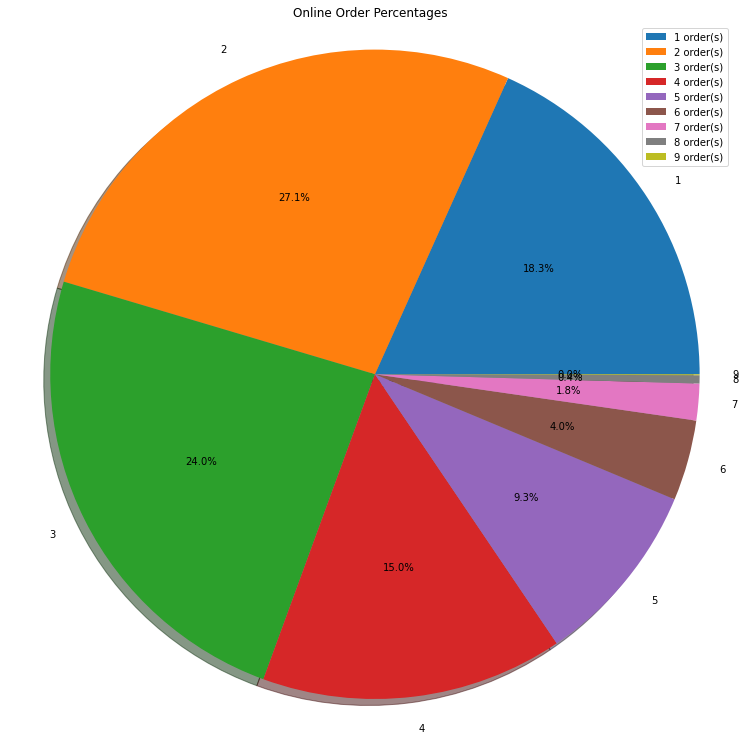

In [34]:
# Show the percentage of customers with different online order numbers (pie)
order_df

o_list = order_df.index.tolist()
frequency_list = order_df["order_frequency"].tolist()

labels = o_list
sizes = frequency_list

plt.figure(figsize=(13, 13))

plt.pie(sizes, labels=labels, autopct='%.1f%%', shadow=True)
plt.axis('equal')
plt.legend(labels, loc='best')

# Access the legend object
legend = plt.legend()

# Define the additional word to add
additional_word = "order(s)"

# Update the legend labels with the additional word
for text in legend.get_texts():
    current_label = text.get_text()
    new_label = current_label + " " + additional_word
    text.set_text(new_label)

# Add title
plt.title("Online Order Percentages")

plt.savefig("charts_graphs/order_dispersion.png")
plt.show()


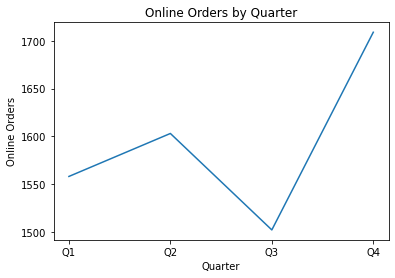

In [35]:
# Show when online orders are the highest (line graph)
# In terms of the whole year, which quarters did the best
quarter_list = quarter_group.index.tolist()
sum_order_list = quarter_group["online_order"].tolist()

quarter = quarter_list
x_axis = np.arange(len(quarter_list))

# Plot the line
plt.plot(x_axis, sum_order_list)

# Format graph
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter)

# Give the chart a title, x label, and y label
plt.title("Online Orders by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Online Orders")

# Show graph
plt.show()


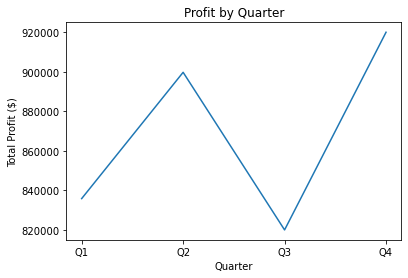

In [36]:
# Show when sales & profits are the highest (line graph)
# In terms of the whole year, which quarters did the best
quarter_list = quarter_group.index.tolist()
sales_list = quarter_group["list_price"].tolist()
prof_list = quarter_group["profit"].tolist()

quarter = quarter_list
x_axis = np.arange(len(quarter_list))

# Plot the line
#plt.plot(x_axis, sales_list)
plt.plot(x_axis, prof_list)

# Format graph
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter)

# Give the chart a title, x label, and y label
plt.title("Profit by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Profit ($)")

# Show graph
plt.show()

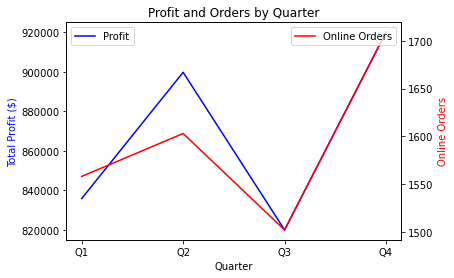

In [37]:
# In terms of the whole year, which quarters did the best
quarter_list = quarter_group.index.tolist()
sales_list = quarter_group["list_price"].tolist()
prof_list = quarter_group["profit"].tolist()
sum_order_list = quarter_group["online_order"].tolist()

quarter = quarter_list
x_axis = np.arange(len(quarter_list))

# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first line graph on the left y-axis
ax1.plot(x_axis, prof_list, color='blue')
ax1.set_title("Profit and Orders by Quarter")
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Profit ($)', color='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the second line graph on the right y-axis
ax2.plot(x_axis, sum_order_list, color='red')
ax2.set_ylabel('Online Orders', color='red')

ax1.set_xticks(x_axis)
ax1.set_xticklabels(quarter)

# Show the legend for both lines
ax1.legend(['Profit'], loc='upper left')
ax2.legend(['Online Orders'], loc='upper right')

plt.savefig("charts_graphs/profits_orders_quarter.png")